# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Creating a vector for column names
col_names = ['age','operation_year','axil_nodes','survival_status']
print(col_names)

['age', 'operation_year', 'axil_nodes', 'survival_status']


In [4]:
file = 'haberman.csv'
data = pd.read_csv(file, names = col_names)

In [5]:
data.head()

,age,operation_year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
# Shape of data
data.shape

(306, 4)

** From above command we are getting dimensions of the data which are:
rows = 306
columns = 4**

In [7]:
# Some information about data 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                306 non-null int64
operation_year     306 non-null int64
axil_nodes         306 non-null int64
survival_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [9]:
data['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64


## Observations:
   * There are 306 entries in the dataset
   * All the features are of integer datatype
   * The data is classified into two parts:
    * Survived patients who belongs to class **1**
    * not_Survi

In [10]:
data['axil_nodes'].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: axil_nodes, dtype: int64

# Creating two dataframes

In [11]:
survived = data.loc[data["survival_status"] == 1]
not_survived = data.loc[data["survival_status"] == 2]

In [12]:
survived.head()

,age,operation_year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# Univariate Analysis

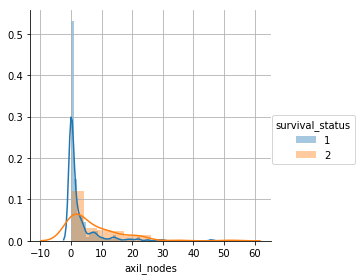

In [13]:
# Histogram of full dataframe
sns.FacetGrid(data, hue = "survival_status", size=4)\
.map(sns.distplot, "axil_nodes")\
.add_legend()
plt.grid()

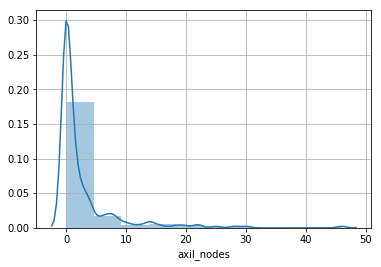

In [14]:
# Histogram of survived dataframe
sns.distplot(survived['axil_nodes'], bins=10)
plt.grid()

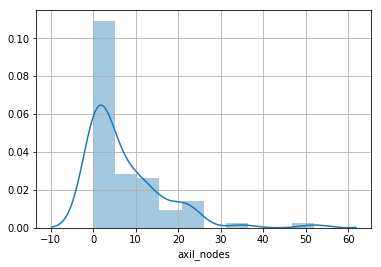

In [15]:
# Histogram of not_survived dataframe
sns.distplot(not_survived['axil_nodes'], bins=10)
plt.grid()

** Observation from above two histogram **
* Survived patients had less number of axil nodes, most of them have 0 and other has very less number of axil nodes.
* In not_survived very less patients have 0 axil nodes and others have more number of axil nodes compared to survived patients.

## AGE

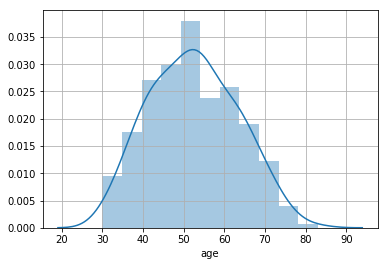

In [16]:
# pdf using seaborn
sns.distplot(data['age'])
plt.grid()

 ** From the above plot we can see that most of the patient are of age 45-55**

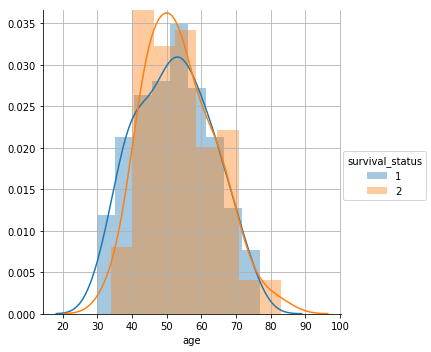

In [17]:
sns.FacetGrid(data, hue = "survival_status", size=5)\
.map(sns.distplot, "age")\
.add_legend()
plt.grid()

** The data is overlapping each other very much so can not see any insight out of it**

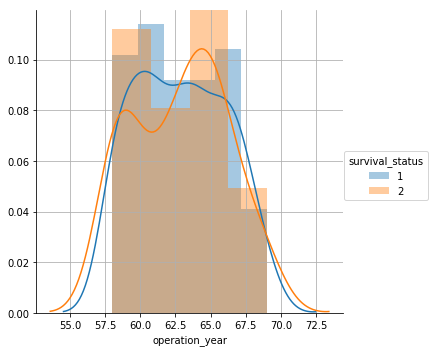

In [18]:
sns.FacetGrid(data, hue = "survival_status", size=5)\
.map(sns.distplot, "operation_year")\
.add_legend()
plt.grid()

# PDF and CDF

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


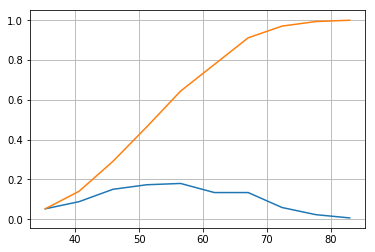

In [19]:
counts, bin_edges = np.histogram(data['age'], bins=10,
                                density = True)

pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#CDF 
cdf = np.cumsum(pdf)  # Cummulative sum
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.grid()
plt.show()

** approx 97% patients have age 70 or less than 70.**

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


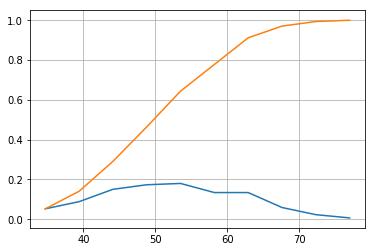

In [20]:
# PDF and CDF of survived dataframe
count, bin_edges = np.histogram(survived['age'], bins =10,
                               density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#CDF 
cdf = np.cumsum(pdf)  # Cummulative sum
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.grid()
plt.show()

** 99% patients survived of age 70 or below.**

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


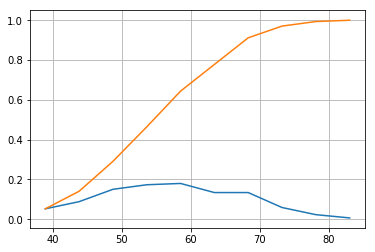

In [21]:
# PDF and CDF of not_survived dataframe
count, bin_edges = np.histogram(not_survived['age'], bins =10,
                               density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#CDF 
cdf = np.cumsum(pdf)  # Cummulative sum
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.grid()
plt.show()

# Bi-variate analysis

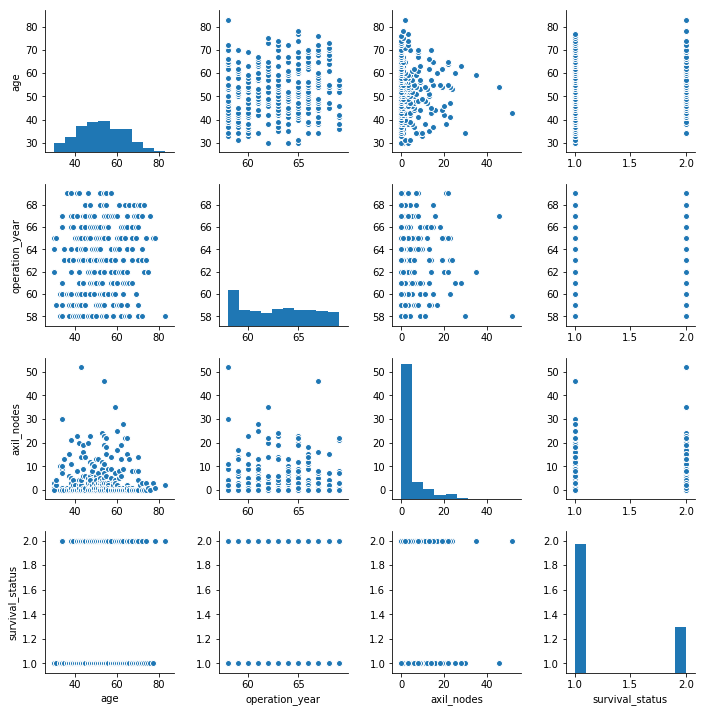

In [22]:
sns.pairplot(data)

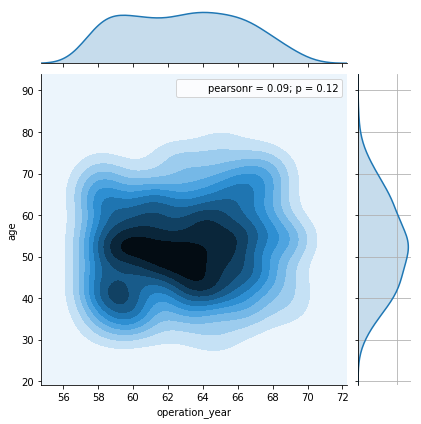

In [23]:
sns.jointplot(x="operation_year", y ="age", data=data, kind="kde")
plt.grid()
plt.show()

## Observation
* ** Most of the patient between age 45-55 **
* ** Most patient operated in between 59-64 year**

# Boxplots

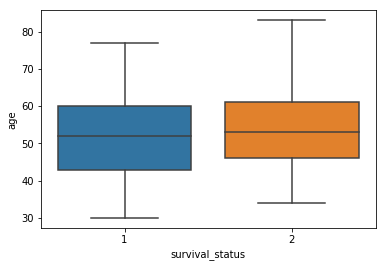

In [24]:
sns.boxplot(x="survival_status", y="age", data = data)

## Observation:
*  50 percentile of survived patients between age 42-60 
*  50 percentile of not_survived patients between age 45-62 
*  the minimum age of a patient is 30 
*  The maximum age of a patient is more than 83 

# Voilin Plot

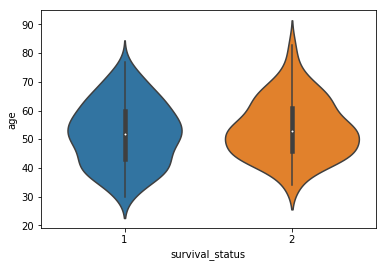

In [25]:
sns.violinplot(x="survival_status", y="age", data = data)

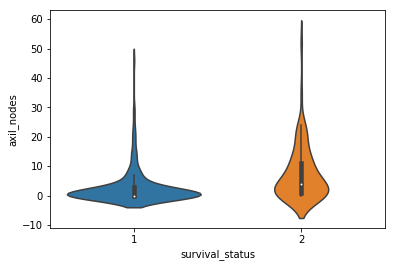

In [26]:
sns.violinplot(x="survival_status", y="axil_nodes", data = data)

## Observation:

* More patients who survived had less axil_nodes.
* Patients who did not survived had more axil_nodes.

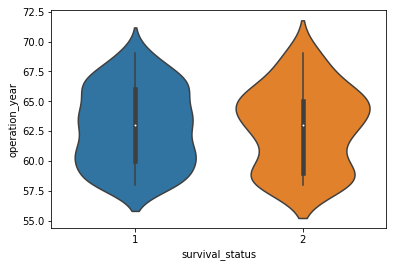

In [27]:
sns.violinplot(x="survival_status", y="operation_year", data = data)

## Observation:
* Some patients got operated in early 60s and the density is slightly less after 62 of survived patients.
* Not_survived patients, some got operated before 60s and most of them got operated between 63-66.
* This shows that a slight early operation_years could make a difference.